# Real State Analisys

Analysis of Real State Market

### Import Dependencies

In [1]:
# import warnings
# warnings.simplefilter('ignore')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
from splinter import Browser
import time
import pprint
import datetime
import json

# Import DB user and password
from api_keys import positionstack_key
from api_keys import opencagedata_API
from api_keys import DATABASE_URL

In [3]:
# !pip install termcolor
from termcolor import colored

In [4]:
 # Imports the method used to connect to DBs
from sqlalchemy import create_engine
from sqlalchemy import exc
from sqlalchemy import update

# Imports the methods needed to abstract python classes into database tables
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

# function to establish a session with a connected database
from sqlalchemy.orm import Session

# database compliant datatypes
from sqlalchemy import Column, Integer, String, Float, ForeignKey, DateTime

# from config import db_user, dialect

In [5]:
# Create database connection
engine = create_engine(DATABASE_URL) 

<hr style="border: 3px solid red;">

### Basic Analysis

In [6]:
# Query database using pandas
SQL_Query_df = pd.read_sql_query('''select * from realstatelisting''', engine)

In [7]:
SQL_Query_df.describe()

,house_id,price,bed,bath,sqft,lot,latitude,longitude
count,4590.000000,4590.000000,4590.000000,4590.000000,4578.000000,4.345000e+03,4590.000000,4590.000000
mean,2317.681917,253356.784096,3.341394,2.237582,1915.384229,1.296428e+04,29.805182,-95.422457
std,1342.259598,54552.300852,0.690507,0.522154,569.831180,3.964432e+05,0.131317,0.157196
min,1.000000,150000.000000,1.000000,0.500000,0.000000,0.000000e+00,29.540761,-95.735992
25%,1148.250000,209999.000000,3.000000,2.000000,1518.000000,4.948000e+03,29.699520,-95.544297
50%,2335.500000,249999.000000,3.000000,2.000000,1827.000000,6.600000e+03,29.810061,-95.426174
75%,3482.750000,299000.000000,4.000000,2.500000,2266.000000,8.280000e+03,29.899404,-95.279514
max,4630.000000,350000.000000,8.000000,4.500000,6700.000000,2.613600e+07,30.209713,-95.081627


In [8]:
SQL_Query_df.head(2)

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,house_link,image_1,image_2,map_link,google_map,created_date
0,1,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://ap.rdcpix.com/b9f727d5efd77dd8bc2f0c79...,https://www.openstreetmap.org/?mlat=29.8113709...,https://www.google.com/maps/place/308+Avenue+o...,2021-01-10 21:13:15.025
1,2,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,https://www.realtor.com/realestateandhomes-det...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://ap.rdcpix.com/434ef360d1242e7680dbcf64...,https://www.openstreetmap.org/?mlat=29.8806332...,https://www.google.com/maps/place/7911+Napawoo...,2021-01-10 21:13:15.139


Text(0, 0.5, 'price')

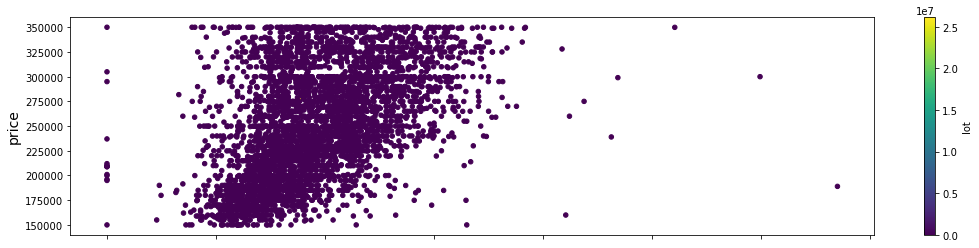

In [9]:
ax1 = SQL_Query_df.plot.scatter(x='sqft',y='price',c='lot', colormap='viridis',figsize=(18,4))
ax1.set_xlabel("sqft", fontsize=14)
ax1.set_ylabel("price", fontsize=14)

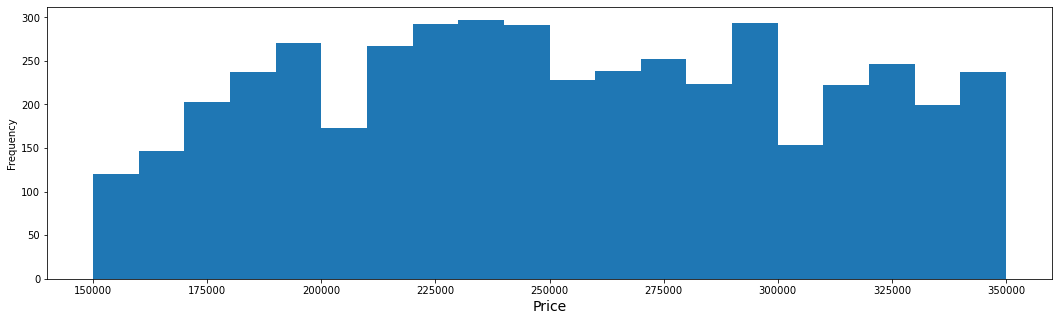

In [10]:
ax1 = SQL_Query_df['price'].plot(kind='hist',bins=20,figsize=(18,5));
ax1.set_xlabel("Price", fontsize=14);

Text(0, 0.5, 'longitude')

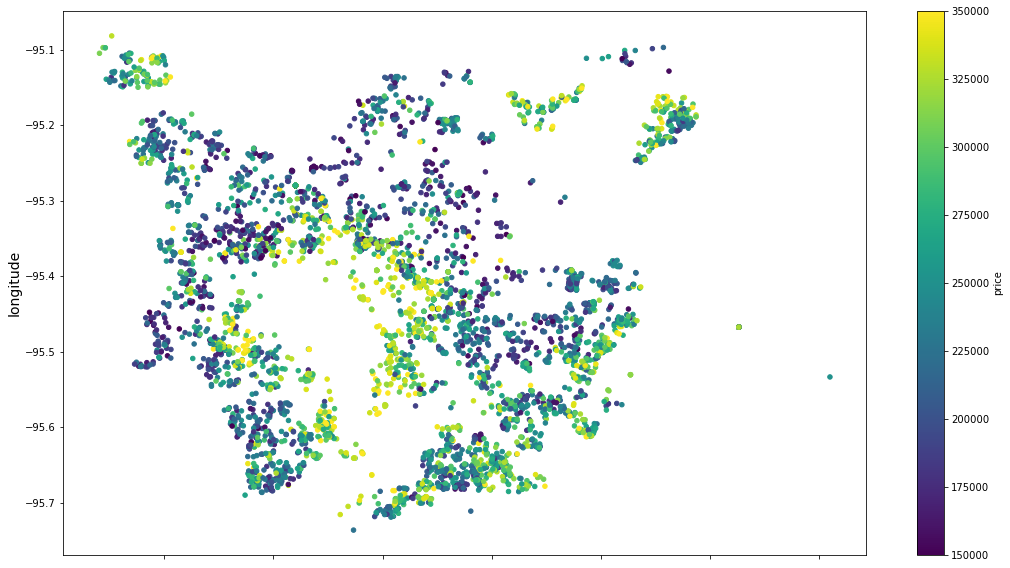

In [11]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)

In [12]:
zipcode_list = []
for jj in range(len(SQL_Query_df)):
    zipcode_list.append(int(SQL_Query_df.iloc[jj].address.split(" ")[-1]))

In [13]:
SQL_Query_df['Zip Code'] = pd.Series(zipcode_list)

In [14]:
print(f"Number of Zip Codes: {len(SQL_Query_df['Zip Code'].unique())}")

Number of Zip Codes: 104


In [15]:
SQL_Query_df.drop(columns={'house_link','image_1','image_2','map_link','google_map'})

,house_id,address,price,bed,bath,sqft,lot,latitude,longitude,created_date,Zip Code
0,1,"308 Avenue of Oaks St, Houston, TX 77009",319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,2021-01-10 21:13:15.025000,77009
1,2,"7911 Napawood Ct, Houston, TX 77088",199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,2021-01-10 21:13:15.139000,77088
2,3,"3110 Willow Wood Trl, Houston, TX 77345",295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,2021-01-10 21:13:15.252000,77345
3,4,"16118 Windom Dr, Houston, TX 77598",179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,2021-01-10 21:13:15.365000,77598
4,5,"3405 Rawley St, Houston, TX 77020",309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,2021-01-10 21:13:15.478000,77020
...,...,...,...,...,...,...,...,...,...,...,...
4585,4626,"9302 Corner Oaks Ln, Houston, TX 77036",229000.0,3.0,2.5,2750.0,7187.0,29.684077,-95.555023,2021-10-02 22:05:13.993994,77036
4586,4627,"7102 Pavilion Pt, Houston, TX 77083",250000.0,4.0,3.0,1608.0,4957.0,29.693068,-95.634400,2021-10-02 22:05:14.052798,77083
4587,4628,"13526 Harefield Hollow Trl, Houston, TX 77049",250990.0,3.0,2.0,1212.0,0.0,29.720205,-95.279514,2021-10-02 22:05:14.111264,77049
4588,4629,"13411 Harefield Hollow Trl, Houston, TX 77049",273990.0,3.0,2.0,1661.0,0.0,29.720205,-95.279514,2021-10-02 22:05:14.171750,77049


Text(0, 0.5, 'Price ($)')

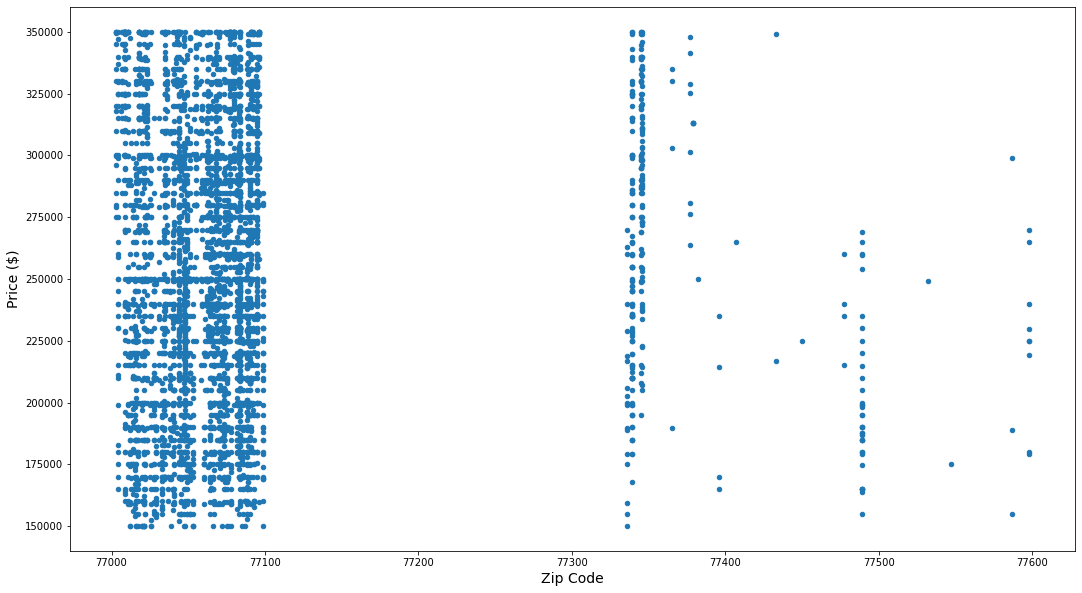

In [16]:
ax1 = SQL_Query_df.plot.scatter(x='Zip Code',y='price',figsize=(18,10))
ax1.set_xlabel("Zip Code", fontsize=14)
ax1.set_ylabel("Price ($)", fontsize=14)

Text(0, 0.5, 'longitude')

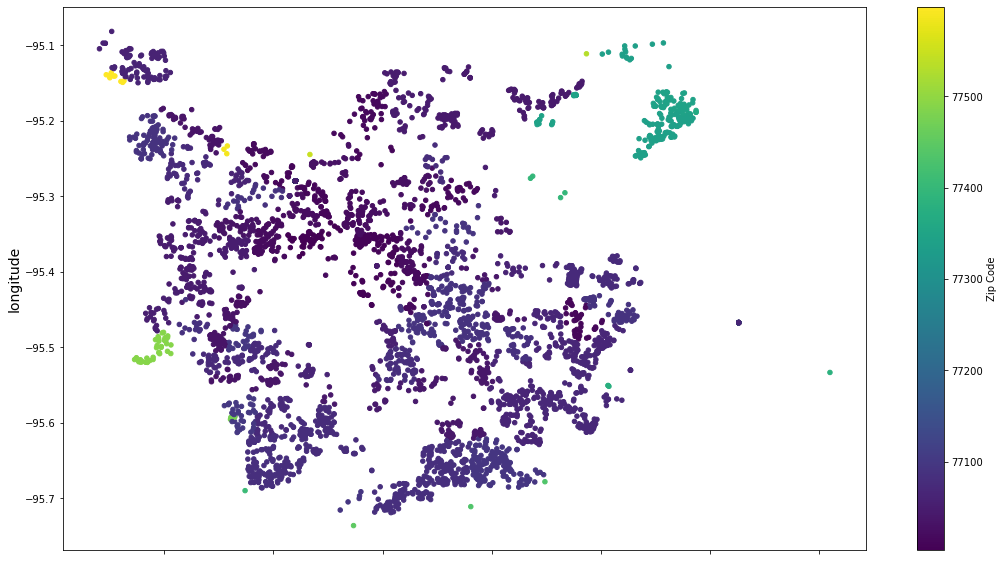

In [17]:
ax1 = SQL_Query_df.plot.scatter(x='latitude',y='longitude',c='Zip Code', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("latitude", fontsize=14)
ax1.set_ylabel("longitude", fontsize=14)

Text(0, 0.5, 'Price ($)')

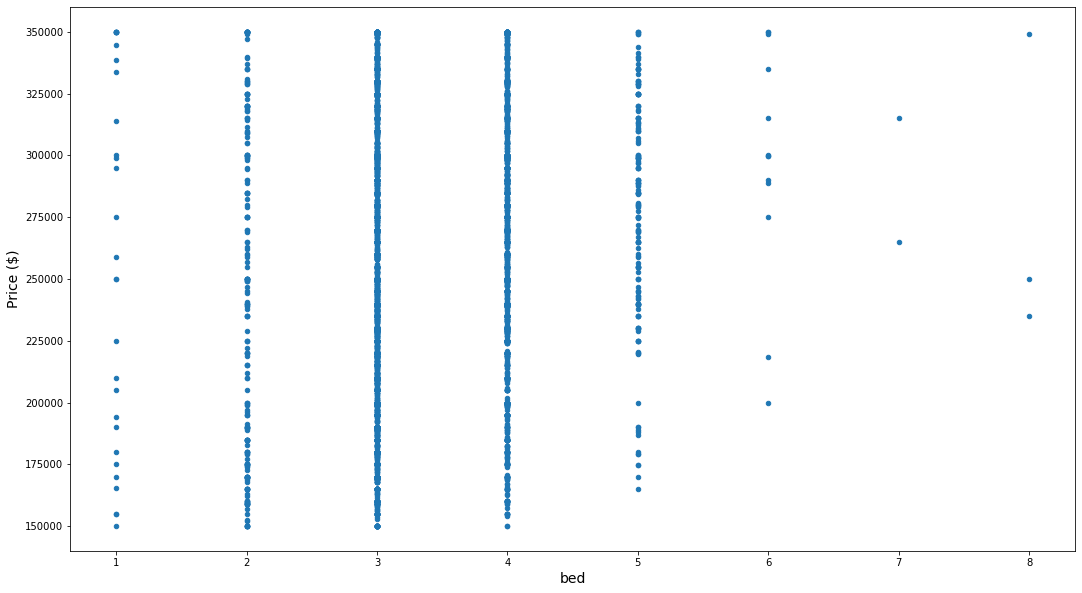

In [18]:
ax1 = SQL_Query_df.plot.scatter(x='bed',y='price',figsize=(18,10))
ax1.set_xlabel("bed", fontsize=14)
ax1.set_ylabel("Price ($)", fontsize=14)

Text(0, 0.5, 'sqft')

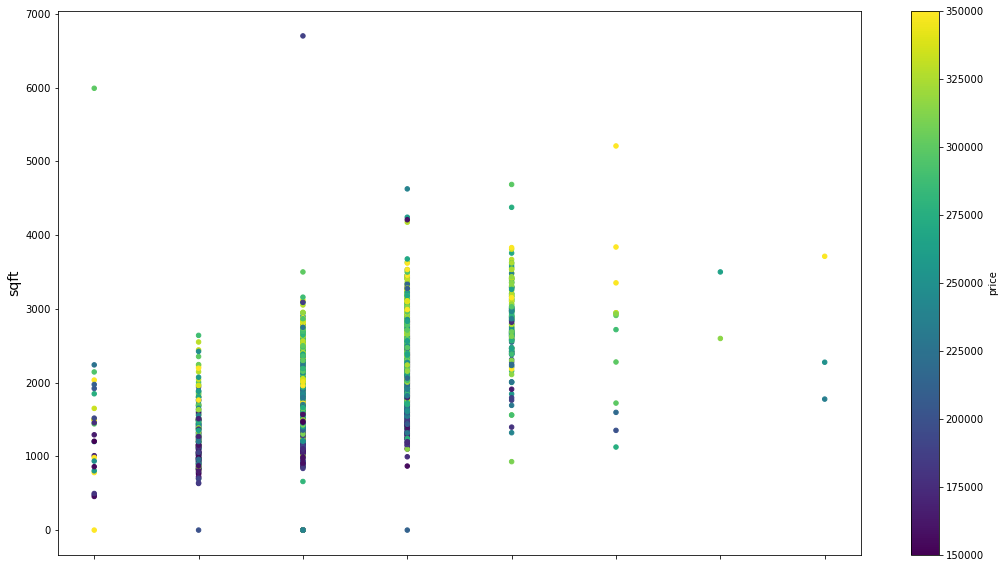

In [19]:
ax1 = SQL_Query_df.plot.scatter(x='bed',y='sqft',c='price', colormap='viridis',figsize=(18,10))
ax1.set_xlabel("Zip Code", fontsize=14)
ax1.set_ylabel("sqft", fontsize=14)

<hr style="border: 3px solid red;">

### Zip Codes Poligons

Import GeoJson zip code poligons from https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json and use the table from https://www.zip-codes.com/city/tx-houston.asp
to filter Houston Zip Codes.

In [20]:
zip_codes = pd.read_csv(os.path.join("Resources","ZipCodes.csv"))

In [21]:
zip_codes

,Zip Code,Type,County,Population,Area Code(s)
0,77001,P.O. Box,Harris,0,832 / 713 / 281 / 346
1,77002,Standard,Harris,"16,793",832 / 713 / 281 / 346
2,77003,Standard,Harris,"10,508",832 / 713 / 281 / 346
3,77004,Standard,Harris,"32,692",832 / 713 / 281 / 346
4,77005,Standard,Harris,"25,528",713 / 832 / 346
...,...,...,...,...,...
173,77291,P.O. Box,Harris,0,832 / 713 / 281 / 346
174,77292,P.O. Box,Harris,0,832 / 713 / 281 / 346
175,77293,P.O. Box,Harris,0,832 / 713 / 281 / 346
176,77297,Unique,Harris,0,832 / 713 / 281 / 346


#### Correlate and Export GeoJson Poligons

In [22]:
# Skip running this if not necessary
run_this = False 

if run_this:
    
    # Create a list with the zip codes
    zip_code_list = list(zip_codes['Zip Code'].values)

    # GeoJson poligon data from Texas
    url_zip_codes = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/tx_texas_zip_codes_geo.min.json"

    # Request the data
    zips_codes_json = requests.get(url_zip_codes).json()

    # Verify if the zip code in the GeoJson is in the list of zip codes
    Houston_zip_codes_Geojson = []
    for jj in range(len(zips_codes_json['features'])):
        if int(zips_codes_json['features'][jj]['properties']['ZCTA5CE10']) in zip_code_list:
            Houston_zip_codes_Geojson.append(zips_codes_json['features'][jj])

    # Save a new GeoJson file
    with open(os.path.join("Resources","HOUSTON_ZIPCODES_GEOJSON.json"), "w") as outfile: 
        json.dump({'type': 'FeatureCollection', 'features': Houston_zip_codes_Geojson }, outfile)

<hr style="border: 3px solid red;">

## Machine Learning (Attempting to predict house prices)

Use ML to investigate the house dataset to get some insigths about the real estate market based on the data collected.

In [23]:
# Create a dataframe with the houses data on the database and drop the columns with urls and address
houses_df = SQL_Query_df.drop(columns={'address','house_link','image_1','image_2','map_link','google_map','created_date'})
print(f"Shape of the data is: {houses_df.shape}")
houses_df.head()

Shape of the data is: (4590, 9)


,house_id,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
0,1,319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,77009
1,2,199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,77088
2,3,295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,77345
3,4,179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,77598
4,5,309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,77020


#### Check how many `null/Nan` values are in each column

In [24]:
houses_df.isnull().sum()

house_id       0
price          0
bed            0
bath           0
sqft          12
lot          245
latitude       0
longitude      0
Zip Code       0
dtype: int64

#### Create a ML model to fill the nulls for the lot size

Shape:  (4335, 1) (4335, 1)


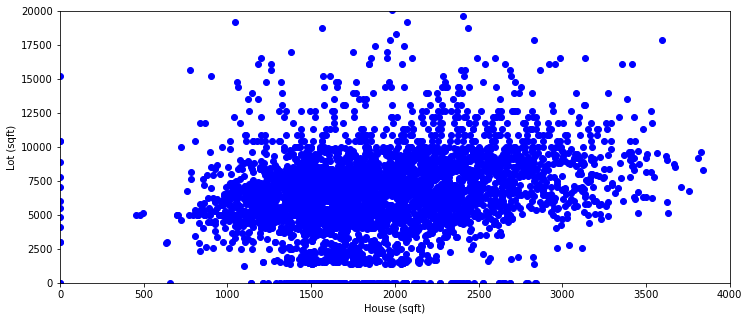

In [25]:
# Create a temporario dataframe without the NANs
houses_no_NAN = houses_df.dropna();

# Assign data values to X and y for model training
X = houses_no_NAN["sqft"].values.reshape(-1,1)
y = houses_no_NAN["lot"].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

# Plot the data to see if a linear trend exists
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(X, y, c='blue')
plt.xlabel("House (sqft)")
plt.ylabel("Lot (sqft)")
plt.xlim([0,4000]);
plt.ylim([0,20000]);

#### Linear Regression

In [26]:
### Use sklearn's `train_test_split` to split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

### Fit the model to the training data. 
model.fit(X_train, y_train)

## Based on the data that we've trained on, a line has been fit to our data. 
# We can view the coefficients and intercept of the line from the `coef_` and `intercept_` attributes.
# print('Weight coefficients: ', model.coef_)
# print('y-axis intercept: ', model.intercept_)
print(f"Linear model: y = {model.intercept_[0]} + {model.coef_[0][0]}x")

### Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

### Call the `score` method on the model to show the r2 score
model_score = model.score(X_test, y_test)
print(colored(f"Model score (r2 score): {model_score}","red"))

# predictions will be a list of all of our predicted y-values
predictions = model.predict(X)

#### Create a DataFrame with each predicted y-value, actual y-value, and error.
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})

Linear model: y = 19945.01033216652 + -2.5357182480632856x
Mean Squared Error (MSE): 101067157.65310779
R-squared (R2): -2.8943835901235597
Model score (r2 score): -2.8943835901235597


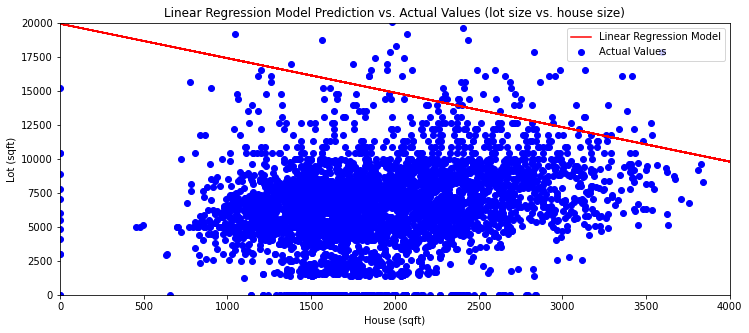

In [27]:
### Plot the actual values (blue) and the prediction line (red)
fig, ax = plt.subplots(figsize=(12, 5))
plt.scatter(X, y, c='blue')
plt.plot(X, predictions, c='red')
plt.title('Linear Regression Model Prediction vs. Actual Values (lot size vs. house size)')
plt.xlabel("House (sqft)")
plt.ylabel("Lot (sqft)")
plt.xlim([0,4000]);
plt.ylim([0,20000]);
plt.legend(["Linear Regression Model","Actual Values"]);

#### Multiple Linear Regression

Shape:  (4335, 3) (4335, 1)
R2 Score: 8.432025924776099e-05


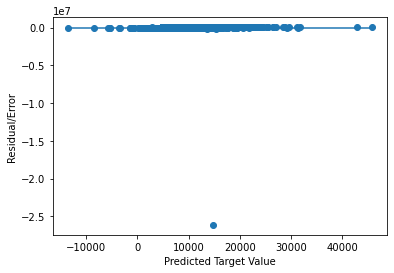

In [28]:
# Assign data values to X and y for model training
X = houses_no_NAN[["sqft","bed","bath"]]
y = houses_no_NAN["lot"].values.reshape(-1,1)
print("Shape: ", X.shape, y.shape)

# Fitting our model with all of our features in X
model.fit(X, y)

score = model.score(X, y)
print(f"R2 Score: {score}")

predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.xlabel("Predicted Target Value")
plt.ylabel("Residual/Error")
plt.show()

#### Cleaning and Preprocessing Data for Machine Learning

So far we have tried the linear regression model without scaling the data. Now, let see if there is any improvement if we scale the data.

In [29]:
## Scaling and Normalization

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.head()

,sqft,bed,bath
3115,2491.0,4.0,3.0
2954,1102.0,2.0,1.0
2297,2842.0,4.0,2.5
124,1503.0,3.0,2.5
3593,1598.0,3.0,2.0


In [30]:
### Fit the training data to the StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

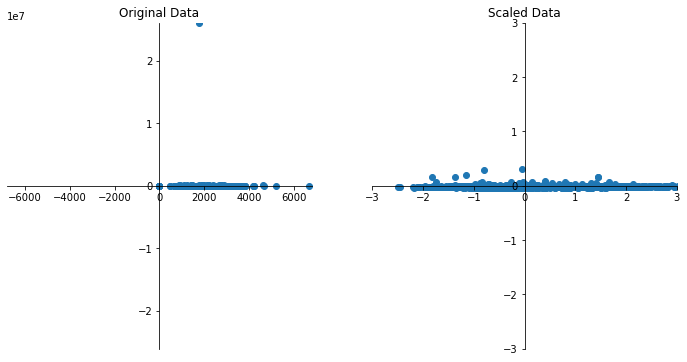

In [31]:
### Plot the scaled data
# Create your subplots
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

# Add title labels
axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

# Using your max x & y values, set the plot axis limits for your 
maxx = X_train["sqft"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx - 100, maxx + 100)
axes1.set_ylim(-maxy - 100, maxy + 100)

# Set limits for your scaled data
axes2.set_xlim(-3, 3)
axes2.set_ylim(-3, 3)

# Use a function to apply plot formatting, to avoid having to write it out twice
def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
# apply formatting function to each axis
set_axes(axes1)
set_axes(axes2)

# plot the original data and the scaled data
axes1.scatter(X_train["sqft"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [32]:
# Fit the Model to the scaled training data and make predictions using the scaled test data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

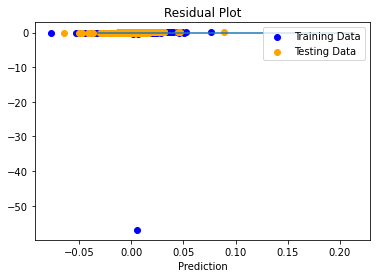

In [33]:
# Step 5) Plot the residuals
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

In [34]:
### Step 6) Quantify your model using the scaled data
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.0005363633989433425, R2: -3.339780275914979


#### Multiple Linear Regression for House Price

In [35]:
cleaned_df = houses_df.dropna()

In [36]:
cleaned_df

,house_id,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
0,1,319900.0,2.0,1.0,1150.0,10454.0,29.811371,-95.367273,77009
1,2,199900.0,4.0,2.5,1920.0,6491.0,29.880633,-95.484069,77088
2,3,295000.0,4.0,2.5,2616.0,10890.0,30.084300,-95.171903,77345
3,4,179000.0,2.0,2.0,1104.0,7150.0,29.551512,-95.136427,77598
4,5,309900.0,3.0,3.5,2508.0,3506.0,29.778996,-95.335636,77020
...,...,...,...,...,...,...,...,...,...
4585,4626,229000.0,3.0,2.5,2750.0,7187.0,29.684077,-95.555023,77036
4586,4627,250000.0,4.0,3.0,1608.0,4957.0,29.693068,-95.634400,77083
4587,4628,250990.0,3.0,2.0,1212.0,0.0,29.720205,-95.279514,77049
4588,4629,273990.0,3.0,2.0,1661.0,0.0,29.720205,-95.279514,77049


In [37]:
# cleaned_df.head().to_html()

In [38]:
X = cleaned_df[['bed', 'bath', 'sqft', 'lot','Zip Code']].values.reshape(-1,5)
y = cleaned_df['price'].values.reshape(-1,1)

In [39]:
## Scaling and Normalization
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
### Fit the training data to the StandardScaler
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

### Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [41]:
# Fit the Model to the scaled training data and make predictions using the scaled test data
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

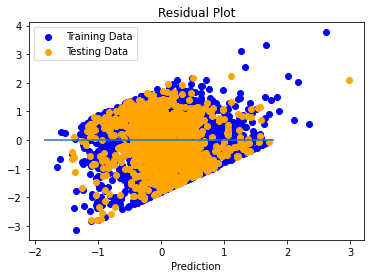

In [42]:
# Step 5) Plot the residuals
# create a residuals plot using the predictions for both test and train data
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()

# create a horizontal line at y=0 to show how much error is in each prediction
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.xlabel("Prediction")
plt.show()

In [43]:
### Step 6) Quantify your model using the scaled data
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.730770151334609, R2: 0.2695939723851233


In [44]:
# Regularization
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7307702976119856, R2: 0.26959382618063277


In [45]:
# LASSO model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7342388193991535, R2: 0.2661270326674685


In [46]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01, l1_ratio=0.001).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.7312897851376905, R2: 0.2690745975020221


<hr style="border: 3px solid red;">

## Machine Learning (Attempting to predict user preferences)

In [47]:
# Query database using pandas to get the inner join for user selection and houses
query_stm = f"""SELECT * FROM userselection 
                INNER JOIN realstatelisting ON userselection.house_id=realstatelisting.house_id;"""
User_Selection_df = pd.read_sql_query(query_stm, engine)

In [48]:
# Verify all user selection possibilities
User_Selection_df['user_choice'].unique()

array(['Dislike', 'Like', 'Love'], dtype=object)

In [49]:
# Replace old values of possible user selection
User_Selection_df.replace('Yes', 'Love',inplace=True)
User_Selection_df.replace('Maybe', 'Like',inplace=True)
User_Selection_df.replace('No', 'Dislike',inplace=True)

In [50]:
# Replace old values of possible user selection
User_Selection_df.replace('Love',2,inplace=True)
User_Selection_df.replace('Like',1,inplace=True)
User_Selection_df.replace('Dislike',0,inplace=True)

In [51]:
# Verify all user selection possibilities
User_Selection_df['user_choice'].unique()

array([0, 1, 2])

In [52]:
# Double check if there were no more 'Yes' as user choice
User_Selection_df['user_choice'].loc[User_Selection_df['user_choice']=='Yes']

Series([], Name: user_choice, dtype: int64)

In [53]:
# Add zip code column
zipcode_list = []
for jj in range(len(User_Selection_df)):
    zipcode_list.append(int(User_Selection_df.iloc[jj].address.split(" ")[-1]))
User_Selection_df['Zip Code'] = pd.Series(zipcode_list)

In [54]:
# Show one row of the user selection dataframe
User_Selection_df.iloc[1]

userselection_id                                                    2
username                                                      Gabriel
useremail                                                        None
house_id                                                         1084
user_choice                                                         0
created_date                               2021-01-27 01:03:15.922000
house_id                                                         1084
address                              3415 Deeds Rd, Houston, TX 77084
price                                                   242900.000000
bed                                                          3.000000
bath                                                         2.000000
sqft                                                      1972.000000
lot                                                       6825.000000
latitude                                                    29.817981
longitude           

In [55]:
# Create a new dataframe with only relevante columns for the user choice investigation
user_df = User_Selection_df[['house_id','username','user_choice','price', 'bed','bath','sqft','lot', 'latitude', 'longitude','Zip Code']]

In [56]:
user_angela_df = user_df[User_Selection_df['username']=='Angela']

#### Look what are the similarities of the houses marked as liked

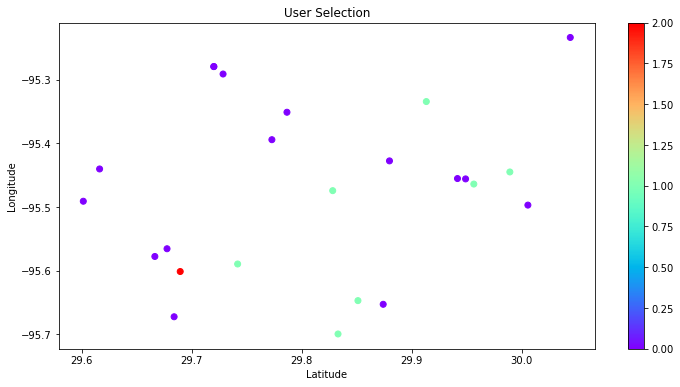

In [57]:
# Geolocation of houses
x = user_angela_df['latitude']
y = user_angela_df['longitude']

plt.figure(figsize=(12, 6))
plt.scatter(x, y, c=user_angela_df['user_choice'], cmap='rainbow')
plt.colorbar()
# plt.legend()
plt.title("User Selection")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [58]:
user_angela_df.loc[user_angela_df['user_choice']==1]

,house_id,house_id,username,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
34,307,307,Angela,1,324900.0,5.0,3.5,3290.0,10454.0,29.851198,-95.647130,77084
58,483,483,Angela,1,222900.0,3.0,2.0,1934.0,8704.0,29.989262,-95.445043,77090
62,422,422,Angela,1,185000.0,3.0,2.0,1976.0,6448.0,29.913337,-95.334454,77039
63,494,494,Angela,1,336070.0,3.0,2.0,1987.0,NaN,29.833087,-95.699524,77084
65,1063,1063,Angela,1,199900.0,3.0,2.0,1701.0,10890.0,29.956507,-95.464041,77067
66,1633,1633,Angela,1,289999.0,3.0,2.0,1980.0,6882.0,29.741848,-95.589607,77077
67,236,236,Angela,1,200000.0,3.0,2.0,2054.0,17424.0,29.828262,-95.474402,77092


In [59]:
# Basic stats on the houses marked as liked
user_angela_df.loc[user_angela_df['user_choice']==1].describe()

,house_id,house_id,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
count,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000
mean,662.571429,662.571429,1.0,251252.714286,3.285714,2.214286,2131.714286,10133.666667,29.873357,-95.522029,77076.142857
std,504.811139,504.811139,0.0,64000.533656,0.755929,0.566947,522.888999,4000.625834,0.085036,0.128104,18.397722
min,236.000000,236.000000,1.0,185000.000000,3.000000,2.000000,1701.000000,6448.000000,29.741848,-95.699524,77039.000000
25%,364.500000,364.500000,1.0,199950.000000,3.000000,2.000000,1955.000000,7337.500000,29.830675,-95.618369,77072.000000
50%,483.000000,483.000000,1.0,222900.000000,3.000000,2.000000,1980.000000,9579.000000,29.851198,-95.474402,77084.000000
75%,778.500000,778.500000,1.0,307449.500000,3.000000,2.000000,2020.500000,10781.000000,29.934922,-95.454542,77087.000000
max,1633.000000,1633.000000,1.0,336070.000000,5.000000,3.500000,3290.000000,17424.000000,29.989262,-95.334454,77092.000000


In [60]:
user_angela_df.dropna(inplace=True)

/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
user_angela_df

,house_id,house_id,username,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
31,1141,1141,Angela,0,225000.0,4.0,2.5,2130.0,9163.0,30.005650,-95.497097,77068
32,331,331,Angela,0,285000.0,2.0,1.0,885.0,4500.0,29.772982,-95.394344,77007
33,663,663,Angela,0,299000.0,3.0,2.5,2452.0,3962.0,29.879855,-95.427648,77088
34,307,307,Angela,1,324900.0,5.0,3.5,3290.0,10454.0,29.851198,-95.647130,77084
35,283,283,Angela,0,172900.0,3.0,2.0,1638.0,12197.0,29.949028,-95.455953,77067
36,202,202,Angela,0,165000.0,2.0,1.0,858.0,5000.0,29.786679,-95.351250,77009
58,483,483,Angela,1,222900.0,3.0,2.0,1934.0,8704.0,29.989262,-95.445043,77090
59,158,158,Angela,0,185000.0,4.0,2.0,2174.0,7245.0,29.677677,-95.565645,77099
60,707,707,Angela,2,195000.0,3.0,2.5,1703.0,3360.0,29.689661,-95.601427,77072
61,1304,1304,Angela,0,229000.0,3.0,2.0,1674.0,6566.0,29.874144,-95.652912,77084


In [62]:
# using get_dummies with a multiple columns
# data_binary_encoded = pd.get_dummies(user_angela_df, columns=["user_choice"])
# data_binary_encoded.head()

### KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
user_angela_df['user_choice'].unique()

array([0, 1, 2])

In [65]:
user_angela_df

,house_id,house_id,username,user_choice,price,bed,bath,sqft,lot,latitude,longitude,Zip Code
31,1141,1141,Angela,0,225000.0,4.0,2.5,2130.0,9163.0,30.005650,-95.497097,77068
32,331,331,Angela,0,285000.0,2.0,1.0,885.0,4500.0,29.772982,-95.394344,77007
33,663,663,Angela,0,299000.0,3.0,2.5,2452.0,3962.0,29.879855,-95.427648,77088
34,307,307,Angela,1,324900.0,5.0,3.5,3290.0,10454.0,29.851198,-95.647130,77084
35,283,283,Angela,0,172900.0,3.0,2.0,1638.0,12197.0,29.949028,-95.455953,77067
36,202,202,Angela,0,165000.0,2.0,1.0,858.0,5000.0,29.786679,-95.351250,77009
58,483,483,Angela,1,222900.0,3.0,2.0,1934.0,8704.0,29.989262,-95.445043,77090
59,158,158,Angela,0,185000.0,4.0,2.0,2174.0,7245.0,29.677677,-95.565645,77099
60,707,707,Angela,2,195000.0,3.0,2.5,1703.0,3360.0,29.689661,-95.601427,77072
61,1304,1304,Angela,0,229000.0,3.0,2.0,1674.0,6566.0,29.874144,-95.652912,77084


In [66]:
X = user_angela_df[['bed']].values.reshape(-1,1)
y = user_angela_df['user_choice']

In [67]:
### Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=43, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [68]:
y_test.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [69]:
y_train.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [70]:
# create the scaler
X_scaler = StandardScaler().fit(X_train)

# scale the training and test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


k: 1, Train/Test Score: 0.980/0.046


/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


k: 3, Train/Test Score: 0.360/0.034


/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


k: 5, Train/Test Score: 0.236/0.032


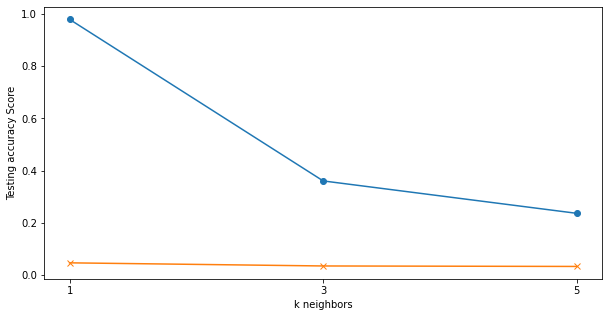

In [71]:
### Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

max_k = 7
k_range = range(1, max_k, 2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.figure(figsize=(10,5))
plt.plot(k_range, train_scores, marker='o')
plt.plot(k_range, test_scores, marker="x")
plt.xticks(k_range)
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [72]:
### Choose the best k from above and re-fit the KNN Classifier using that k value.
knn = KNeighborsClassifier(n_neighbors=max_k)
knn.fit(X_train_scaled, y_train)
print('k=21 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=21 Test Acc: 0.033


/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [73]:
knn

KNeighborsClassifier(n_neighbors=7)

In [74]:
predictions = knn.predict(X)

ValueError: query data dimension must match training data dimension

In [75]:
predictions

array([-0.41939129,  0.14994981, -0.89872457, ..., -0.09358258,
        0.06856093, -0.00785251])

In [76]:
predictions.sum()

-8.743432188499298

1. build the cluster;
2. begin with small k;

### Create a Logistic Regression Model

In [77]:
### Create a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

### Fit (train) model using the training data
classifier.fit(X_train_scaled, y_train)

### Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

### Predict the user choice with of the new data point
# new_datapoint_scaladed = X_scaler.transform(user_angela_df[['price','bed', 'bath', 'sqft', 'lot', 'Zip Code']].iloc[4].values.reshape(-1,6))
# predictions = classifier.predict(new_datapoint_scaladed)
# print("Classes are either 0 (dislike) or 1 (like)")
# print(f"The new point was classified as: {predictions}")

### View predictions along with their probabilities of being within each class
predictions = classifier.predict(X_test_scaled)
probs = classifier.predict_proba(X_test_scaled)


prob_df = pd.DataFrame({
    "Prediction": predictions, 
    "Actual": y_test, 
    "P(dislike|0)": [p[0] for p in probs], 
    "P(like|1)": [p[1] for p in probs]})

prob_df

/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/gabrielpivaro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Data Score: 0.04275607505382959
Testing Data Score: 0.016605166051660517


ValueError: Data must be 1-dimensional

In [ ]:
### View the rows with incorrect predictions
prob_df[prob_df['Prediction'] != prob_df['Actual']]

<hr style="border: 3px solid red;">

### Machine Learning (Clustering the Houses)

### K-means (based on geolocation, k=7)

In [ ]:
data_input = SQL_Query_df[['latitude','longitude']].values

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1])
plt.title('Houses Geographical Distribution')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [ ]:
### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

In [ ]:
### Fit the model to the data
kmeans.fit(data_input)

In [ ]:
### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

In [ ]:
# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [ ]:
predicted_clusters

### K-means (based on geolocation + Price, k=7)

The results of this attempt show that the clusters contain houses in all regions. <strong>The cluster is pretty much determined by the feature selected, in this case, house price.</strong> This should be a good starting point and then refine the model with more features (iterate).

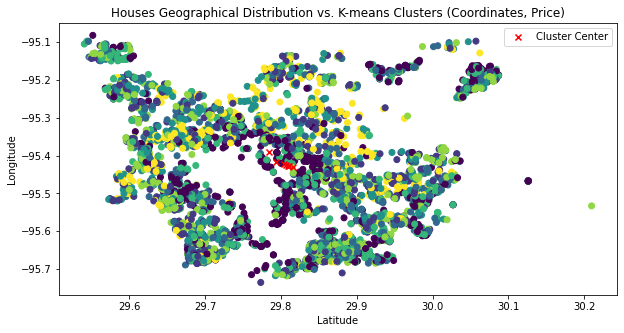

In [78]:
# Select which columns will be used to create the clusters
data_input = SQL_Query_df[['latitude','longitude','price']].values


### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [79]:
# Preview of clusters
predicted_clusters

array([0, 3, 4, ..., 5, 2, 5], dtype=int32)

In [80]:
# Copy original dataframe
clusters_df = SQL_Query_df.copy()

In [81]:
# Add column with the cluster
clusters_df['Cluster'] = pd.Series(predicted_clusters)

In [82]:
average_price = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    print(f"Cluster {ii} |  ${avg_price}")
    average_price.append(avg_price)

---------------------------------------------
Cluster 0 |  $334897.0
---------------------------------------------
Cluster 3 |  $190481.0
---------------------------------------------
Cluster 4 |  $301432.0
---------------------------------------------
Cluster 6 |  $165306.0
---------------------------------------------
Cluster 2 |  $272274.0
---------------------------------------------
Cluster 1 |  $218904.0
---------------------------------------------
Cluster 5 |  $244219.0


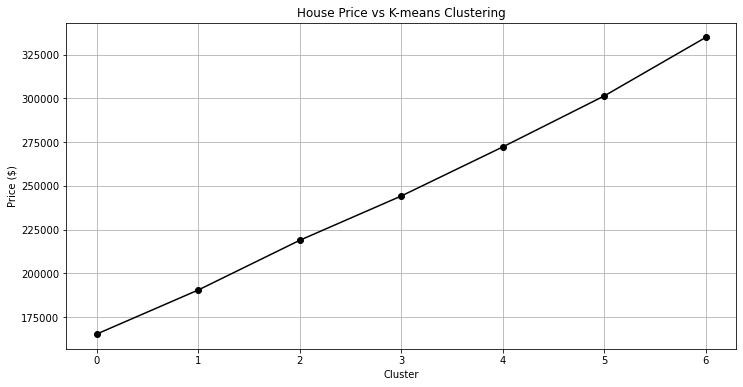

In [83]:
# Plot 
average_price.sort()
fig = plt.figure(figsize=(12, 6))
plt.plot(average_price,marker='o',c='black')
plt.xlabel('Cluster')
plt.ylabel('Price ($)')
plt.title('House Price vs K-means Clustering')
plt.grid()

Text(0.5, 1.0, 'Cluster: #2')

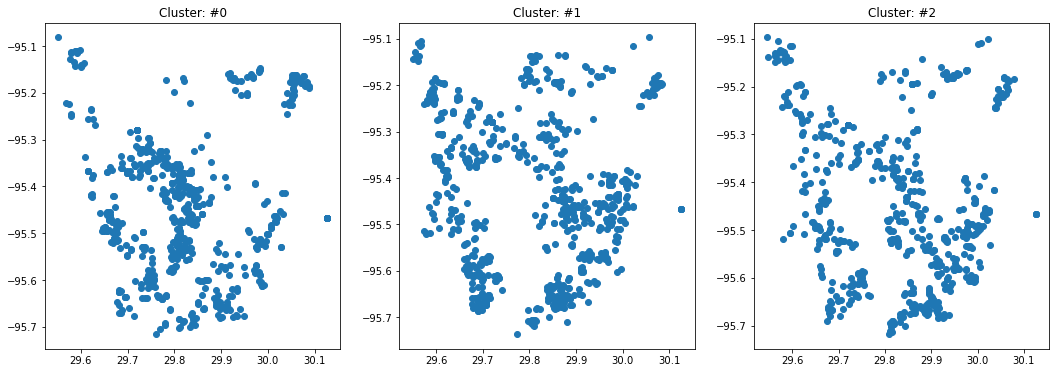

In [84]:
### Plot 3 clustes to see the similarities in geographic region
# Create your subplots
fig1 = plt.figure(figsize=(18, 6))
axes1 = fig1.add_subplot(1, 3, 1)
axes2 = fig1.add_subplot(1, 3, 2)
axes3 = fig1.add_subplot(1, 3, 3)

axes1.scatter(clusters_df[['latitude']].loc[clusters_df['Cluster'] == 0],clusters_df[['longitude']].loc[clusters_df['Cluster'] == 0])
axes1.set_title('Cluster: #0')
axes2.scatter(clusters_df[['latitude']].loc[clusters_df['Cluster'] == 1],clusters_df[['longitude']].loc[clusters_df['Cluster'] == 1])
axes2.set_title('Cluster: #1')
axes3.scatter(clusters_df[['latitude']].loc[clusters_df['Cluster'] == 2],clusters_df[['longitude']].loc[clusters_df['Cluster'] == 2])
axes3.set_title('Cluster: #2')

### K-means (based on geolocation + Price + Beds, k=3)

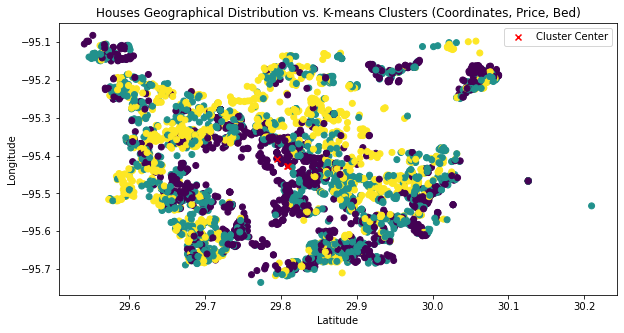

In [85]:
# Select which columns will be used to create the clusters
data_input = SQL_Query_df[['latitude','longitude','price', 'bed']].values

### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price, Bed)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

In [86]:
# Copy original dataframe
clusters_df = SQL_Query_df.copy()

# Add column with the cluster
clusters_df['Cluster'] = pd.Series(predicted_clusters)

average_price = []
average_bed = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    avg_bed = round(clusters_df[['bed']].loc[clusters_df['Cluster'] == ii].values.mean())
    print(f"Cluster {ii} |  ${avg_price} | {avg_bed} bed")
    average_price.append(avg_price)
    average_bed.append(avg_bed)

---------------------------------------------
Cluster 0 |  $316659.0 | 3.0 bed
---------------------------------------------
Cluster 2 |  $187777.0 | 3.0 bed
---------------------------------------------
Cluster 1 |  $248487.0 | 3.0 bed


<hr style="border: 3px solid red;">

### First Attempt With Clustering

Using price and 3 clusters

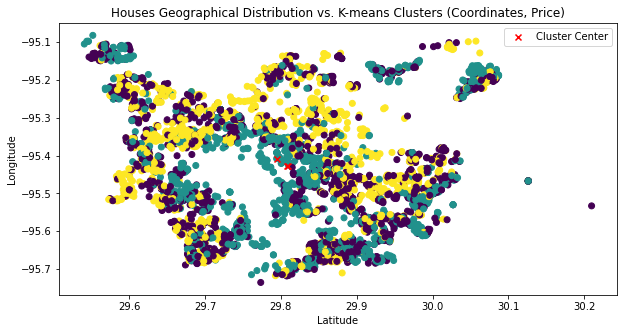

---------------------------------------------
Cluster 1 |  $316637.0
---------------------------------------------
Cluster 2 |  $187620.0
---------------------------------------------
Cluster 0 |  $248342.0


In [87]:
# Select which columns will be used to create the clusters
data_input = SQL_Query_df[['latitude','longitude','price']].values

### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

# Copy original dataframe
clusters_df = SQL_Query_df.copy()

# Add column with the cluster
clusters_df['Cluster'] = pd.Series(predicted_clusters)

average_price = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    
    print(f"Cluster {ii} |  ${avg_price}" )
    average_price.append(avg_price)

In [88]:
# Example of cluster 0
print(f"{clusters_df.loc[clusters_df['Cluster']==0].iloc[0]}")

house_id                                                       14
address                     15003 Pearhaven Dr, Houston, TX 77062
price                                               275000.000000
bed                                                      4.000000
bath                                                     2.500000
sqft                                                  2548.000000
lot                                                   9090.000000
latitude                                                29.581364
longitude                                              -95.128447
house_link      https://www.realtor.com/realestateandhomes-det...
image_1         https://ap.rdcpix.com/d9b38955da2e0e385a024320...
image_2         https://ap.rdcpix.com/d9b38955da2e0e385a024320...
map_link        https://www.openstreetmap.org/?mlat=29.5813636...
google_map      https://www.google.com/maps/place/15003+Pearha...
created_date                           2021-01-11 20:28:57.573000
Zip Code  

In [89]:
# Example of cluster 2
print(f"{clusters_df.loc[clusters_df['Cluster']==2].iloc[0]}")

house_id                                                        2
address                       7911 Napawood Ct, Houston, TX 77088
price                                               199900.000000
bed                                                      4.000000
bath                                                     2.500000
sqft                                                  1920.000000
lot                                                   6491.000000
latitude                                                29.880633
longitude                                              -95.484069
house_link      https://www.realtor.com/realestateandhomes-det...
image_1         https://ap.rdcpix.com/434ef360d1242e7680dbcf64...
image_2         https://ap.rdcpix.com/434ef360d1242e7680dbcf64...
map_link        https://www.openstreetmap.org/?mlat=29.8806332...
google_map      https://www.google.com/maps/place/7911+Napawoo...
created_date                           2021-01-10 21:13:15.139000
Zip Code  

In [90]:
clusters_2nd_pick_df = clusters_df.loc[clusters_df['Cluster']==0]

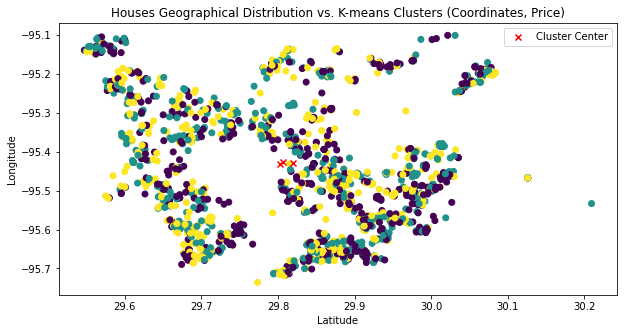

---------------------------------------------
Cluster 0 |  $248342.0


In [91]:
# Select which columns will be used to create the clusters
data_input = clusters_2nd_pick_df[['latitude','longitude','price']].values

### Create a K-Means model
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)

### Fit the model to the data
kmeans.fit(data_input)

### Predict the cluster for each datapoint
predicted_clusters = kmeans.predict(data_input)

# Store the cluster centers and labels as variables
clusters_centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.scatter(data_input[:, 0], data_input[:, 1], c=predicted_clusters)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], c='r', marker='x', label='Cluster Center')
plt.title('Houses Geographical Distribution vs. K-means Clusters (Coordinates, Price)')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.legend()
plt.show()

# Copy original dataframe
clusters_df = clusters_2nd_pick_df.copy()

# Add column with the cluster
clusters_df['Cluster 2nd'] = pd.Series(predicted_clusters)

average_price = []
# Loop over the clusters to show the diference in the mean house price
for ii in list(clusters_df['Cluster'].unique()):
    print('---'*15)
    avg_price = round(clusters_df[['price']].loc[clusters_df['Cluster'] == ii].values.mean())
    
    print(f"Cluster {ii} |  ${avg_price}" )
    average_price.append(avg_price)

<hr style="border: 3px solid red;">

# Saving ML Model

In [ ]:
import pickle

with open(os.path.join('Models','kmeans1.pkl'),'wb') as f:
    pickle.dump(kmeans, f)

In [ ]:
# Loading the saved model

with open(os.path.join('Models','kmeans1.pkl'), 'rb') as f:
    model = pickle.load(f)

In [ ]:
# Test the saved model
predicted_clusters = model.predict(data_input)

In [ ]:
predicted_clusters

In [ ]:
# Testing with a single input
houseinfo = SQL_Query_df.loc[SQL_Query_df['house_id']==173]
houseinfo[['latitude','longitude','price']].values
print(f"This houses is from cluster = {model.predict(houseinfo[['latitude','longitude','price']].values)[0]}")

In [ ]:
# Testing with a single input
houseinfo = SQL_Query_df.loc[SQL_Query_df['house_id']==573]
houseinfo[['latitude','longitude','price']].values
print(f"This houses is from cluster = {model.predict(houseinfo[['latitude','longitude','price']].values)[0]}")